In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [6]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [7]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [8]:
df.shape

(42000, 785)

In [9]:
import matplotlib.pyplot as plt

In [10]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
6190      8       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
6190       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
6190         0         0         0         0  

[1 rows x 785 columns]

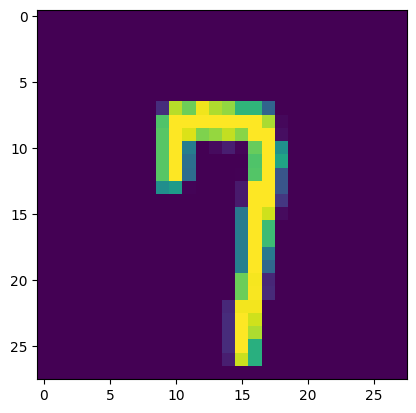

In [11]:
plt.imshow(df.iloc[4409,1:].values.reshape(28,28))

In [12]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [13]:
X

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 784 columns]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(33600, 784)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.200038433074951


In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model is : ",np.round(accuracy_score(y_test,y_pred)*100),"%")

Accuracy of the model is :  96.0 %


<h1>Using PCA</h1>

In [21]:
# Step 1 : Standardize the Data / Mean Centering
from sklearn.preprocessing import StandardScaler

In [22]:
std = StandardScaler()

In [23]:
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=200)

In [27]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [28]:
knn2 = KNeighborsClassifier()

In [29]:
knn2.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [31]:
y_pred2 = knn2.predict(X_test_trf)

In [38]:
print("Accuracy score of the model after PCA : ",np.round(accuracy_score(y_test,y_pred2)*100),"%")

Accuracy score of the model after PCA :  95.0 %


In [39]:
#transforming in 3D

In [40]:
pca = PCA(n_components=3)

In [41]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [42]:
X_train_trf

array([[-2.71861344, -0.4903966 ,  1.13595314],
       [-0.6770269 , -6.75241077, -2.33735108],
       [-3.03321592,  6.5095465 ,  7.4922533 ],
       ...,
       [ 2.14883065,  0.78090525, -0.74730542],
       [ 1.05959611,  0.94685298,  3.95067487],
       [17.70253294,  1.96319819, -4.94504409]])

In [43]:
import plotly.express as px

In [44]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [45]:
pca.explained_variance_

array([40.67111198, 29.17023368, 26.7445957 ])

In [47]:
pca.components_.shape

(3, 784)

In [48]:
pca.components_

array([[ 3.56666419e-18, -2.77516226e-19, -2.44957594e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.61465198e-17,  1.29322135e-17,  5.57406527e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.34397944e-16, -1.31115585e-17, -1.09636462e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [49]:
# finding the optimum numbers of Principal Components

In [55]:
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926963, 3.80423894])

In [56]:
# Again performing PCA

In [57]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [58]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [60]:
pca.components_

array([[-1.50074992e-19,  2.77555756e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.77002386e-20, -1.38777878e-17, -1.38777878e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.53221129e-20, -1.38777878e-17, -4.16333634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00, -2.59902693e-01,  1.00738751e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  3.76403320e-03,  8.94342098e-03, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  1.49152063e-02, -5.28752150e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [61]:
pca.components_.shape

(784, 784)

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

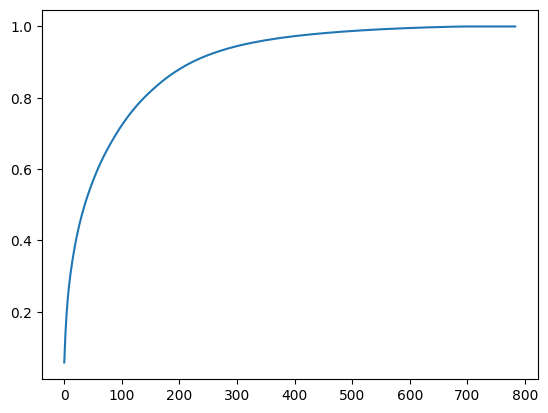

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [65]:
# Around 200-300 we are getting 90% variance explained
# So around 200-300 would be the optimal number of n_components for our PCA